#### Logistic Regression is used for classification only

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1- Data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Step 2 - Quality Checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
# For dropping duplicate values
df = df.drop_duplicates(keep="first").reset_index(drop=True)

# reseting index is imp

In [ ]:
df.shape

(149, 5)

### step 3 - Seperate X and Y(species)

In [9]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

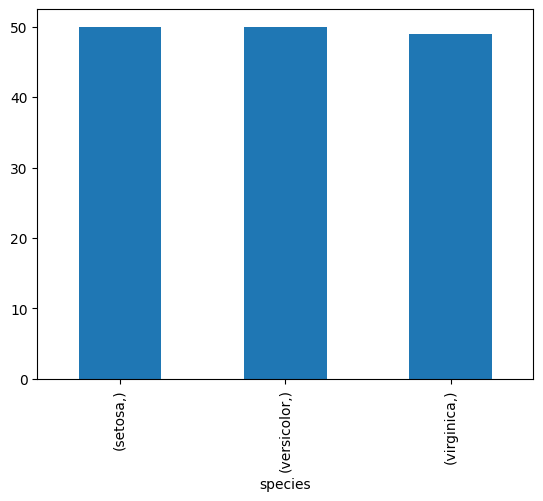

In [13]:
Y.value_counts().plot(kind="bar")

## step 4 - 

In [14]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

#### only numeric features are there in X , hence we will use only numerical pipeline here


In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Step 5 - Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=17)

In [ ]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
105,2.121077,-0.137353,1.618191,1.191183
42,-1.743384,0.322549,-1.390014,-1.308624
52,1.275726,0.092598,0.653295,0.401770
97,0.430375,-0.367304,0.312744,0.138633
100,0.551140,0.552499,1.277639,1.717458


In [20]:
ytrain.head()

,species
105,virginica
42,setosa
52,versicolor
97,versicolor
100,virginica


In [21]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
89,-0.414976,-1.287108,0.142468,0.138633
112,1.154962,-0.137353,0.993846,1.191183
81,-0.414976,-1.517058,-0.027808,-0.256073
19,-0.898033,1.702254,-1.276496,-1.177055
48,-0.656505,1.472303,-1.276496,-1.308624


In [22]:
ytest.head()

,species
89,versicolor
112,virginica
81,versicolor
19,setosa
48,setosa


In [23]:
xtrain.shape

(99, 4)

In [24]:
xtest.shape

(50, 4)

### Step 6 - Model Building

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(xtrain, ytrain)

LogisticRegression()

In [26]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
model.intercept_

array([-0.23445806,  1.59381551, -1.35935746])

In [28]:
model.coef_

array([[-0.92638252,  0.97832875, -1.63960788, -1.60047755],
       [ 0.62601654, -0.41768197, -0.35175216, -0.60819129],
       [ 0.30036598, -0.56064678,  1.99136004,  2.20866884]])

### 7 Model Evaluation

In [29]:
# Accuracy on train
model.score(xtrain, ytrain)

0.9797979797979798

In [30]:
# Accuracy on test
model.score(xtest, ytest)

0.96

In [37]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [38]:
ytest.head()

,species
89,versicolor
112,virginica
81,versicolor
19,setosa
48,setosa


In [39]:
yprob_test = model.predict_proba(xtest)
yprob_test[0:5]

array([[3.10668758e-02, 8.43926348e-01, 1.25006776e-01],
       [1.60295090e-04, 8.51290372e-02, 9.14710668e-01],
       [4.54245027e-02, 9.23375864e-01, 3.11996329e-02],
       [9.91456598e-01, 8.54254823e-03, 8.53978558e-07],
       [9.85059712e-01, 1.49393036e-02, 9.84813555e-07]])

In [40]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
yprob_test[0]

array([0.03106688, 0.84392635, 0.12500678])

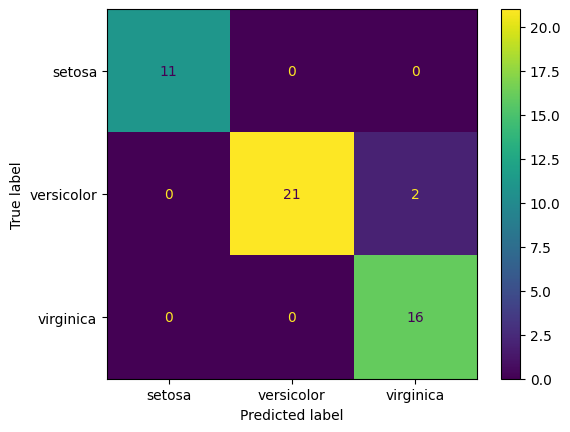

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.91      0.95        23
   virginica       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.97        50
weighted avg       0.96      0.96      0.96        50



In [44]:
from sklearn.metrics import f1_score

f1_score(ytest, ypred_test, average="macro")

np.float64(0.9652406417112299)

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")

scores

array([1.        , 0.94405594, 0.94871795, 0.88888889, 1.        ])

In [46]:
scores.mean()

np.float64(0.9563325563325563)

#### From above metrics i have good f1_macro > 0.8 hence it is good model and can be used for out of sample prediction


### Step 8 - Out of sample predection

In [47]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [48]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [49]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,0.000000,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.000000


In [50]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [51]:
probs = model.predict_proba(xnew_pre)
probs

array([[3.10668758e-02, 8.43926348e-01, 1.25006776e-01],
       [1.66624149e-04, 7.50439166e-02, 9.24789459e-01],
       [1.70574133e-01, 8.11689974e-01, 1.77358932e-02],
       [8.40438548e-01, 1.59174377e-01, 3.87074966e-04],
       [5.06976627e-03, 2.51358832e-01, 7.43571402e-01],
       [9.65036917e-01, 3.49613389e-02, 1.74378267e-06],
       [1.87326202e-01, 7.59792825e-01, 5.28809735e-02],
       [7.09836170e-04, 1.51398857e-01, 8.47891307e-01],
       [9.85059712e-01, 1.49393036e-02, 9.84813555e-07],
       [9.08790036e-01, 9.09244704e-02, 2.85493480e-04],
       [2.75321699e-02, 8.79262952e-01, 9.32048785e-02],
       [4.54245027e-02, 9.23375864e-01, 3.11996329e-02],
       [4.78707246e-06, 2.76612039e-02, 9.72334009e-01],
       [4.88708040e-03, 6.69183523e-01, 3.25929396e-01],
       [9.87072569e-04, 4.83669651e-01, 5.15343276e-01]])

In [52]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
xnew["species_pred"] = preds
xnew[model.classes_] = probs

In [54]:
xnew = xnew.round(4)
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0311,0.8439,0.1250
1,6.9,3.1,5.1,2.3,virginica,0.0002,0.0750,0.9248
2,5.1,2.5,3.0,1.1,versicolor,0.1706,0.8117,0.0177
3,4.4,2.9,NaN,0.2,setosa,0.8404,0.1592,0.0004
4,5.9,3.0,5.1,1.8,virginica,0.0051,0.2514,0.7436
5,5.5,3.5,1.3,0.2,setosa,0.9650,0.0350,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1873,0.7598,0.0529
7,6.5,3.0,5.2,2.0,virginica,0.0007,0.1514,0.8479
8,5.3,3.7,1.5,0.2,setosa,0.9851,0.0149,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9088,0.0909,0.0003


In [55]:
xnew.to_csv("Logistic_Result.csv", index=False)

## Save the preprocessor and model object

In [56]:
%pip install joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [58]:
joblib.dump(model, "logistic_model.joblib")

['logistic_model.joblib']

### Open the models with joblib

In [59]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [60]:
m = joblib.load("logistic_model.joblib")
m

LogisticRegression()